# Пример вычисления разложения решения алгебраического уравнения с помощью многоугольника Ньютона

**Задача**. Найти все вещественные разложения решений уравнения
$$ 
x^4+x^2y^2-2x^2y-xy^2+y^2=0
$$
вблизи нуля.

**Замечание.** Теория метода вычисления разложения решений плоской алгебраической кривой изложена в п.5 статьи 

[*А. Д. Брюно, А. Б. Батхин* Алгоритмы и программы вычисления корней многочлена от одной или двух неизвестных // Программирование, 2021, № 5, с. 22–43 DOI: 10.31857/S0132347421050046](./PRGM0022.pdf)

**Решение**. Воспользуемся методами *степенной геометрии*, использующие *многоугольник Ньютона*

In [1]:
import numpy as np
from scipy.spatial import ConvexHull,convex_hull_plot_2d
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols, Function, Eq, solve, I, collect, expand, simplify,\
                  Derivative, init_printing, series, evaluate, Poly

init_printing() # Для красивой печати

x,y = symbols("x y",real=True) # переменные по умолчанию

Определим встомогательные процедуры

1. Процедура **SCH** - возвращает носитель и многоугольник Ньютона (выпуклую оболочку) многочлена относительно указанных переменных.
2. Процедура **Normlst** - возвращает список нормалей к рёбрам многоугольника Ньютона.
3. Процедура **GetTrunc** - возвращает укороченный многочлен, соответствующий грани с указанным номером.
4. Процедура **NPimage** - изображает многоугольник Ньютона и носитель многочлена
5. Процедура **AddEdgeLabel** - наносит надписи на рисунок

In [2]:
# Загружаем процедуры
from PG.pglib import *

In [3]:
# Исходный многочлен определяем как обычное выражение, а не как полином
f = x**4 + x**2*y**2-2*x**2*y-x*y**2+y**2
#f.as_poly([x,y])
f

In [4]:
# Вычисляем его носитель, многоугольник Ньютона и список нормалей
S,C = SCH(f,[x,y])
normlst = Normlst(C)
[(i,normal) for i,normal in enumerate(normlst)]

[(0, array([-1, -2,  4], dtype=int32)),
 (1, array([ 1,  1, -4], dtype=int32)),
 (2, array([ 0,  1, -2], dtype=int32))]

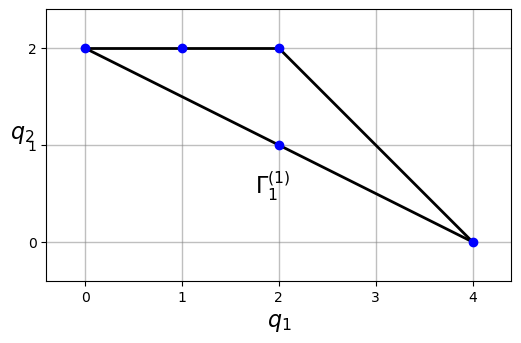

In [5]:
# Изобразим многоугольник и отметим ребро с отрицательной нормалью
ax = NPimage(C,S)
AddEdgeLabel(ax,S,C,normlst,0,r'$\Gamma_1^{(1)}$')
#plt.savefig("fig1.pdf",dpi=300,bbox_inches='tight')
plt.show()

In [6]:
# Находим укороченный многочлен, соответствующий ребру с номером 0
# Раскладываем его на множители
f1 = GetTrunc(f,C,0).factor()
f1

In [7]:
# Для него теорема о неявной функции неприменима! 
# Нужна подстановка y = x^2+z
sol1 = solve(f1.args[0],y)
z = symbols("z",real = True) # Определяем новую переменную z
subs_y = {y:sol1[0]+z}
subs_y

In [8]:
# Делаем замену переменной y, получаем новый многочлен
g = f.subs(subs_y).expand()
g#.as_poly((x,z))

In [9]:
# Вычисляем его носитель, многоугольник Ньютона и список нормалей
S1,C1 = SCH(g,(x,z))
normlst1 = Normlst(C1)
S1,normlst1

(array([[0, 2],
        [1, 2],
        [2, 2],
        [3, 1],
        [4, 1],
        [5, 0],
        [6, 0]], dtype=int32),
 array([[-1, -2,  5],
        [ 0, -1,  0],
        [ 0,  1, -2],
        [ 1,  2, -6]], dtype=int32))

In [17]:
C1.equations

array([[-0.37139068, -0.92847669,  1.85695338],
       [ 0.        , -1.        , -0.        ],
       [ 0.        ,  1.        , -2.        ],
       [ 0.4472136 ,  0.89442719, -2.68328157]])

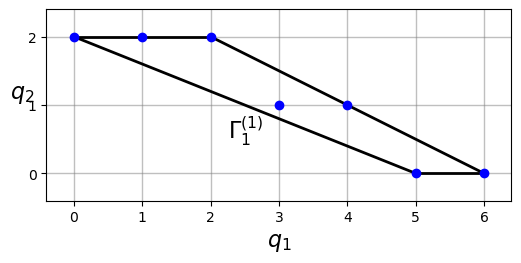

In [10]:
ax1 = NPimage(C1,S1)
AddEdgeLabel(ax1,S1,C1,normlst,0,r'$\Gamma_1^{(1)}$')
#plt.savefig("fig1.pdf",dpi=300,bbox_inches='tight')
plt.show()

In [11]:
# Подходящая нормаль соответствует ребру 1
# Вычисляем укороченный многочлен
g1 = GetTrunc(g,C1,0,(x,z)).factor()
g1

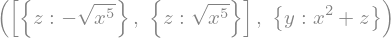

In [12]:
# Находим его корни и подставляем его в ряд для y
sol2 = solve(g1,z,dict=True)
sol2,subs_y

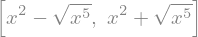

In [13]:
# Получаем в окрестности нуля две ветви решений
sollst = [subs_y[y].subs(sol) for sol in sol2]
sollst

In [21]:
# Чтобы не было дробных степеней в разложении можно сделать подстановку
# x = t^2
t = symbols("t",positive=True)
Subs_x = {x:t**2}
Subs_t = {t:x**sym.Rational(1/2)}
[f.subs(Subs_x) for f in sollst]

In [22]:
# Чтобы найти следующий член разложения, выполняем подстановку
# x = t^2, y=t^4+t^5+z, получаем новый многочлен от (t,z) и для него повторяем вычисления
subs_xy1 = [(x,t**2),(y,t**4+t**5+z)]
subs_xy2 = [(x,t**2),(y,t**4-t**5+z)]
f2a=f.subs(subs_xy1).expand().collect([t,z])
f2b=f.subs(subs_xy2).expand().collect([t,z])
f2a

In [23]:
# Из последнего выражения видно, что подходящее укорочение содержит мономы
# -2*t**11+2*t**5*z
solve(-2*t**11+2*t**5*z,z)[0].subs(Subs_t)

In [24]:
# Изобразим решения уравнения f(x,y)=0 численно
# Определим функции для эффективного вычисления многочлена и вычисленных корней
vf = sym.lambdify([x,y],f,"numpy")
roots = [sym.lambdify(x,root,"numpy") for root in sollst]

In [25]:
# Зададим сетку 
xmin,xmax = -0.5, 1.5
ymin,ymax = -0.5, 1.5
N = 1500
xdiap = np.linspace(xmin,xmax,N)
xrdiap = np.linspace(0,1,N)
ydiap = np.linspace(ymin,ymax,N)
X,Y = np.meshgrid(xdiap,ydiap)
Z = vf(X,Y)
roots_vals = [v(xrdiap) for v in roots]

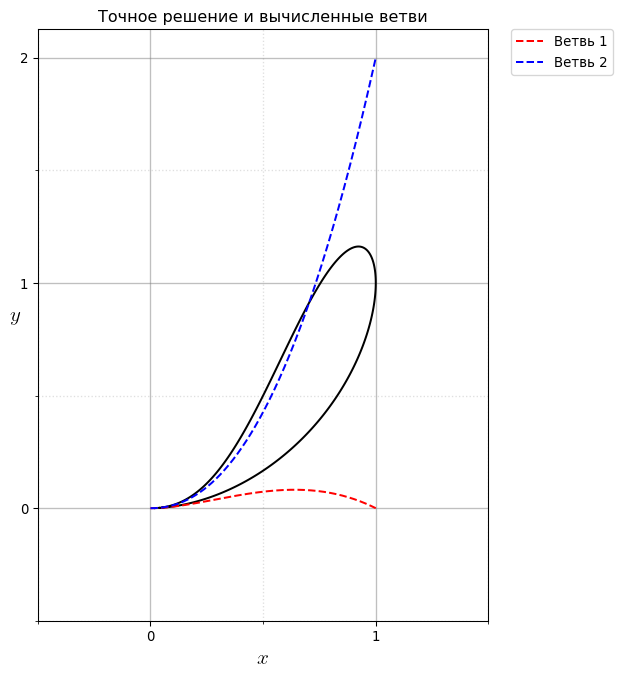

In [26]:
fig=plt.figure(figsize=(8,8),dpi=96)
cplt1=fig.add_subplot(111, aspect='equal',autoscale_on=True)
cplt1.set_xlabel('$x$',fontsize=16,usetex=True)
cplt1.set_ylabel('$y$',fontsize=16,usetex=True,rotation=0)
major_ticks = np.arange(-2, 3, 1)
minor_ticks = np.arange(-1.5, 3, 1)
#cplt1.set_ylim([ymin,ymax])
cplt1.set_title("Точное решение и вычисленные ветви")
cplt1.set_xticks(major_ticks)
cplt1.set_xticks(minor_ticks, minor=True)
cplt1.set_yticks(major_ticks)
cplt1.set_yticks(minor_ticks, minor=True)
cplt1.grid(which='major',color="grey",linestyle='-',lw=1,alpha=0.5)
cplt1.grid(which='minor',color="grey",linestyle=':',lw=1,alpha=0.25)
cplt1.set_aspect('equal')

cntr = cplt1.contour(X,Y,Z,[0],linewidths=1.5,linestyles='-',colors='k')
#cntr.collections[0].set_label("Точное решение")
cplt1.plot(xrdiap,roots_vals[0],'r--',label="Ветвь 1")
cplt1.plot(xrdiap,roots_vals[1],'b--',label="Ветвь 2")
cplt1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()